In [1]:
from Neuron_analysis_tool.load import Analyzer, long_pulse_protocol
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


In [2]:

def Rin_func(seg):
    imp = h.Impedance(seg.x, sec=seg.sec)
    imp.loc(seg.x, sec=seg.sec)
    imp.compute(0, 1)
    return imp.input(seg.x, sec=seg.sec)


In [3]:
analyser = Analyzer(type='L5PC')

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 53716.91it/s]


(<Figure size 1200x300 with 4 Axes>,
 array([<AxesSubplot:title={'center':'morphology'}>,
        <AxesSubplot:title={'center':'d3_2 dendogram'}>,
        <AxesSubplot:title={'center':'long pulse attanuation'}, xlabel='distance from origin (x / lamda)', ylabel='V(x)/V(0) (%)'>,
        <AxesSubplot:title={'center':'short pulse attanuation'}, xlabel='distance from origin (x / lamda)', ylabel='V(x)/V(0) (%)'>],
       dtype=object))

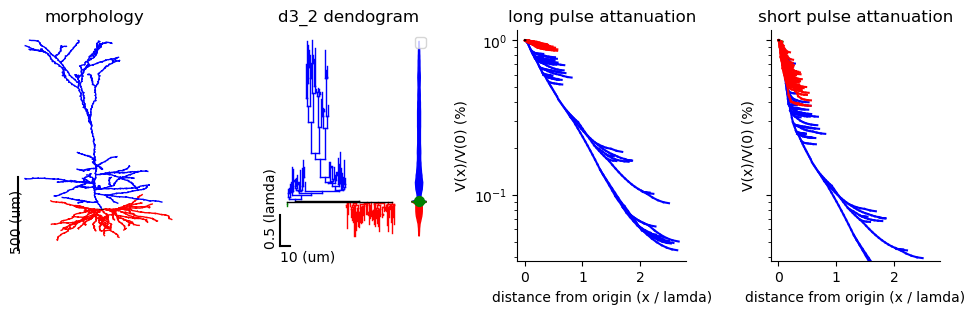

In [4]:
analyser.create_card(theta=-90)

optimizing lines: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 113187.88it/s]


(<Figure size 1200x300 with 4 Axes>,
 array([<AxesSubplot:title={'center':'morphology'}>,
        <AxesSubplot:title={'center':'d3_2 dendogram'}>,
        <AxesSubplot:title={'center':'long pulse attanuation'}, xlabel='distance from origin (x / lamda)', ylabel='V(x)/V(0) (%)'>,
        <AxesSubplot:title={'center':'short pulse attanuation'}, xlabel='distance from origin (x / lamda)', ylabel='V(x)/V(0) (%)'>],
       dtype=object))

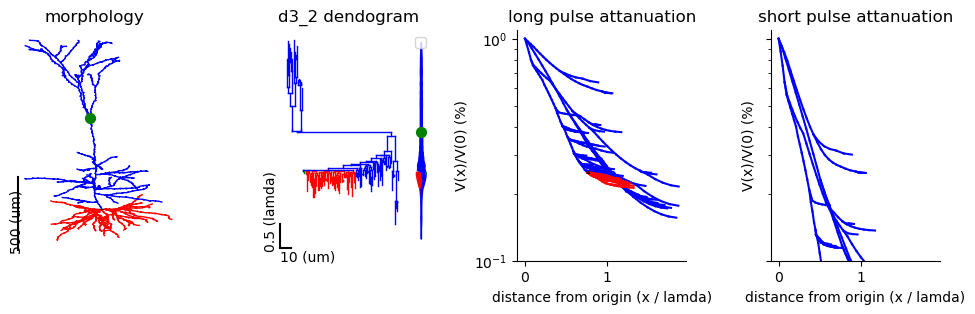

In [5]:
analyser.create_card(start_seg=list(analyser.cell.apic[50])[-1], theta=-90)

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 39887.61it/s]


Text(0, 0.5, 'Rin (M ohm)')

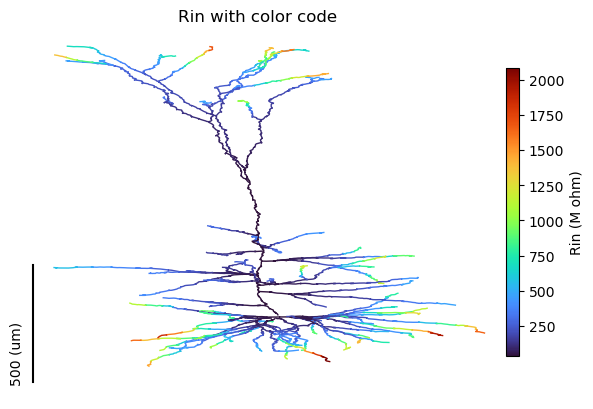

In [6]:
plt.title('Rin with color code')
analyser.plot_morph_with_value_func(func = Rin_func, run_time=1000, theta=-90, scale=500)
plt.ylabel('Rin (M ohm)')


In [23]:
mechanisms_names = set()
for sec in [analyser.cell.apic[50]]:
    for seg in sec:
        for mechanisms in seg:
            try: print(mechanisms, getattr(mechanisms, 'g'+str(mechanisms)+'bar'))
            except: pass
            mechanisms_names.add(str(mechanisms ))

Im 6.75e-05
NaTa_t 0.0213
SKv3_1 0.000261
Ca_HVA 5.55e-05
Ca_LVAst 0.000187
SK_E2 0.0012
Ih 0.0022801654
Ih 0.0024251394
SK_E2 0.0012
Ca_LVAst 0.000187
Ca_HVA 5.55e-05
SKv3_1 0.000261
NaTa_t 0.0213
Im 6.75e-05
Im 6.75e-05
NaTa_t 0.0213
SKv3_1 0.000261
Ca_HVA 5.55e-05
Ca_LVAst 0.000187
SK_E2 0.0012
Ih 0.0024251394
Im 6.75e-05
NaTa_t 0.0213
SKv3_1 0.000261
Ca_HVA 0.000555
Ca_LVAst 0.0187
SK_E2 0.0012
Ih 0.0026588155


In [21]:
mechanisms_names

{'CaDynamics_E2',
 'Ca_HVA',
 'Ca_LVAst',
 'Ih',
 'Im',
 'NaTa_t',
 'SK_E2',
 'SKv3_1',
 'ca_ion',
 'k_ion',
 'na_ion',
 'pas'}

optimizing lines: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 110257.99it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


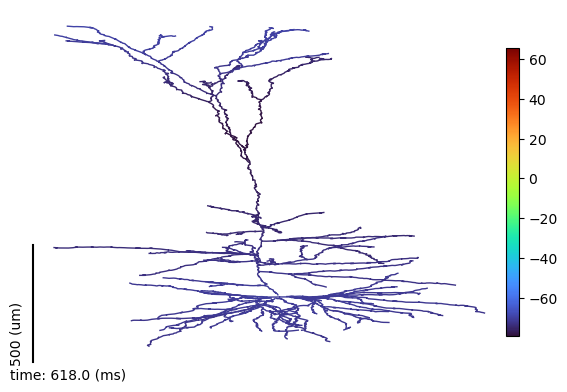

In [16]:
record_dict, time = analyser.record_protocol(cut_start_ms=1000.0, record_name='v')
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, fps=10, clip_name='L', threads=4, slow_down_factor=50, func_for_missing_frames=np.max, theta=-90)
animation.ipython_display(fps=10, loop=True, autoplay=True)

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 31438.43it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


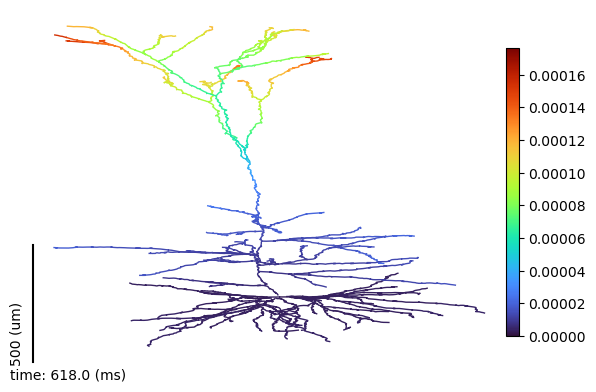

In [14]:
record_dict, time = analyser.record_protocol(cut_start_ms=1000.0, record_name='gIh_Ih')
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, fps=10, clip_name='L', threads=4, slow_down_factor=50, func_for_missing_frames=np.max, theta=-90)
animation.ipython_display(fps=10, loop=True, autoplay=True)

optimizing lines: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 112414.00it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


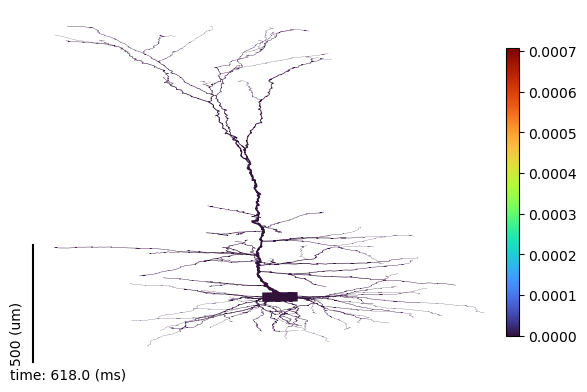

In [24]:
record_dict, time = analyser.record_protocol(cut_start_ms=1000.0, record_name='gCa_LVAst_Ca_LVAst')
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, fps=10, clip_name='L2', threads=4, slow_down_factor=50, func_for_missing_frames=np.max, theta=-90, diam_factor=0.5)
animation.ipython_display(fps=10, loop=True, autoplay=True)